<a href="https://colab.research.google.com/github/HeerRawal0138pg/MRM-FInal-group-10-assignment/blob/main/Question%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving order_items.csv to order_items (2).csv
Saving products.csv to products (1).csv


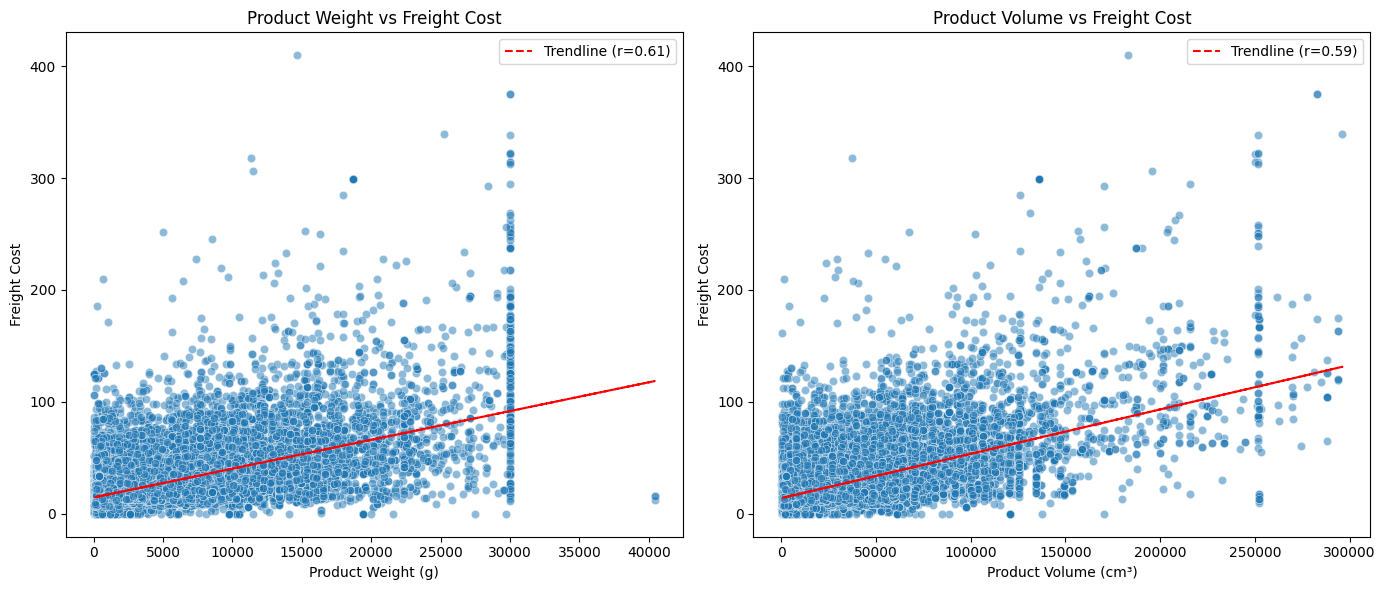

Correlation between Product Weight and Freight Cost: 0.61
Correlation between Product Volume and Freight Cost: 0.59


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload files manually
uploaded = files.upload()

# Step 2: Read CSV files
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")

# Step 3: Merge order_items with product details
merged_df = order_items_df.merge(products_df, on="product_id", how="inner")

# Step 4: Drop missing values in relevant columns
merged_df = merged_df.dropna(subset=["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "freight_value"])

# Step 5: Create a new column for product volume (cm³)
merged_df["product_volume_cm3"] = (
    merged_df["product_length_cm"] * merged_df["product_height_cm"] * merged_df["product_width_cm"]
)

# Step 6: Calculate correlation coefficients
correlation_weight = np.corrcoef(merged_df["product_weight_g"], merged_df["freight_value"])[0, 1]
correlation_volume = np.corrcoef(merged_df["product_volume_cm3"], merged_df["freight_value"])[0, 1]

# Step 7: Fit trendlines (linear regression)
weight_slope, weight_intercept = np.polyfit(merged_df["product_weight_g"], merged_df["freight_value"], 1)
volume_slope, volume_intercept = np.polyfit(merged_df["product_volume_cm3"], merged_df["freight_value"], 1)

# Step 8: Plot scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot: Weight vs Freight Cost
sns.scatterplot(x=merged_df["product_weight_g"], y=merged_df["freight_value"], alpha=0.5, ax=axes[0])
axes[0].plot(merged_df["product_weight_g"], weight_slope * merged_df["product_weight_g"] + weight_intercept,
             color="red", linestyle="dashed", label=f"Trendline (r={correlation_weight:.2f})")
axes[0].set_title("Product Weight vs Freight Cost")
axes[0].set_xlabel("Product Weight (g)")
axes[0].set_ylabel("Freight Cost")
axes[0].legend()

# Scatter plot: Volume vs Freight Cost
sns.scatterplot(x=merged_df["product_volume_cm3"], y=merged_df["freight_value"], alpha=0.5, ax=axes[1])
axes[1].plot(merged_df["product_volume_cm3"], volume_slope * merged_df["product_volume_cm3"] + volume_intercept,
             color="red", linestyle="dashed", label=f"Trendline (r={correlation_volume:.2f})")
axes[1].set_title("Product Volume vs Freight Cost")
axes[1].set_xlabel("Product Volume (cm³)")
axes[1].set_ylabel("Freight Cost")
axes[1].legend()

plt.tight_layout()
plt.show()

# Step 9: Print correlation values
print(f"Correlation between Product Weight and Freight Cost: {correlation_weight:.2f}")
print(f"Correlation between Product Volume and Freight Cost: {correlation_volume:.2f}")
